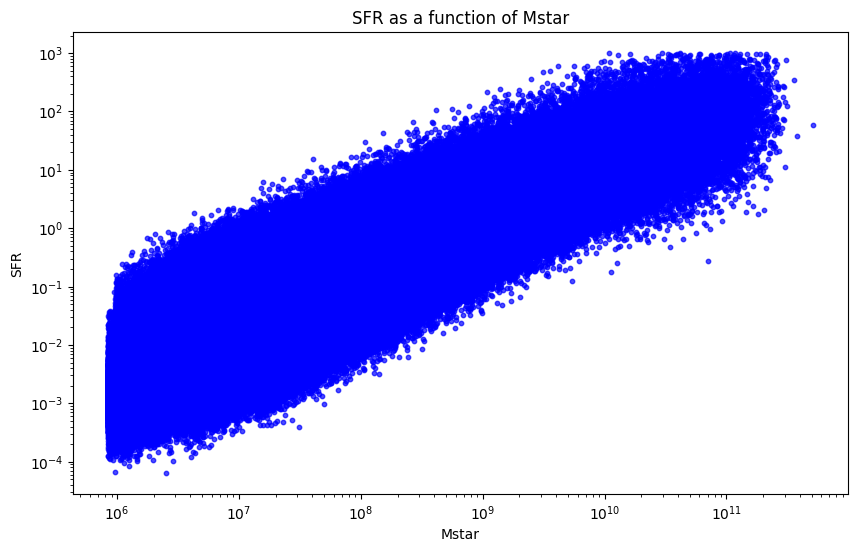

In [1]:
from astropy.table import Table

# Path to the FITS file (adjust if needed for your WSL mapping)
file_path = '/mnt/g/data/PhD Projects/SR/uchuu catalogs 2022/pySIDES_from_uchuu_tile_0_0.fits'

# Read the FITS file using astropy Table
table = Table.read(file_path)

# Convert the astropy Table to a pandas DataFrame
df = table.to_pandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Mstar'], df['SFR'], alpha=0.7, s=10, c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mstar')
plt.ylabel('SFR')
plt.title('SFR as a function of Mstar')
plt.show()

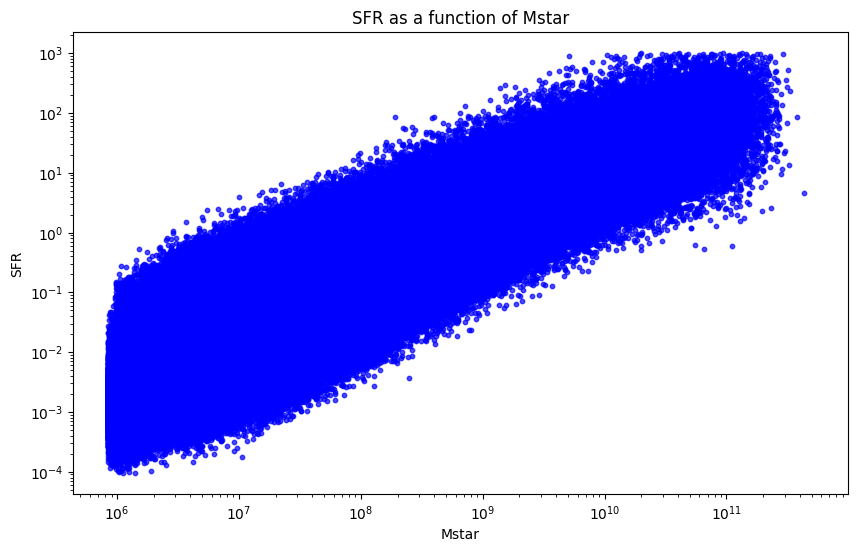

In [2]:
from astropy.table import Table

# Path to the FITS file (adjust if needed for your WSL mapping)
file_path = '/mnt/g/data/PhD Projects/SR/pysides_from_uchuu catalogs/pySIDES_from_uchuu_tile_0_0.fits'

# Read the FITS file using astropy Table
table = Table.read(file_path)

# Convert the astropy Table to a pandas DataFrame
df2 = table.to_pandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df2['Mstar'], df2['SFR'], alpha=0.7, s=10, c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mstar')
plt.ylabel('SFR')
plt.title('SFR as a function of Mstar')
plt.show()

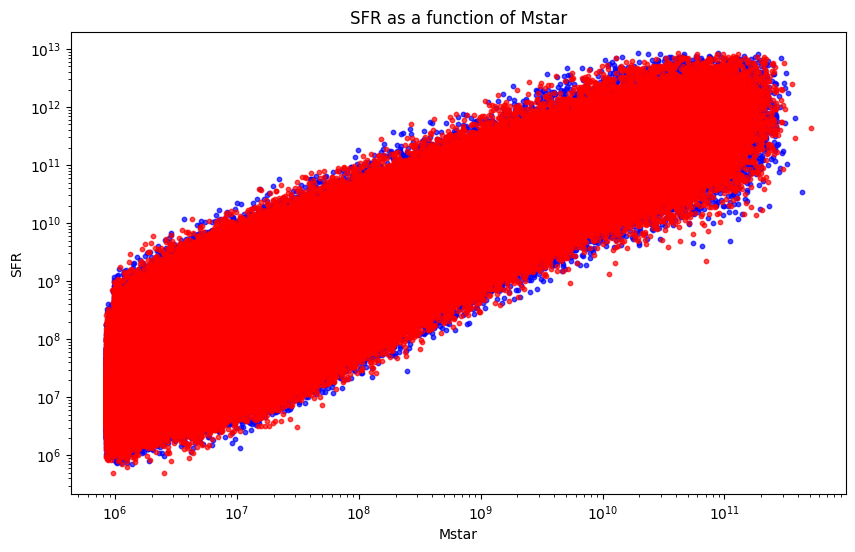

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['Mstar'], df2['LFIR'], alpha=0.7, s=10, c='blue')
plt.scatter(df['Mstar'], df['LFIR'], alpha=0.7, s=10, c='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mstar')
plt.ylabel('SFR')
plt.title('SFR as a function of Mstar')
plt.show()

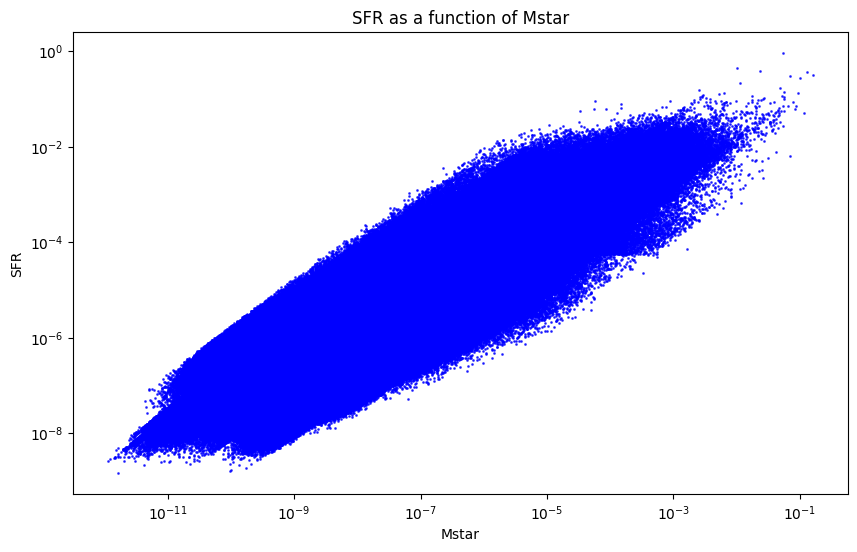

In [ ]:
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

path_sr = '/mnt/d/SPIRE-SR-AI/data/raw/catalogs/sim/120_deg2_shark_sides_input_test_catalog.fits'
# Read the FITS file using astropy Table
table = Table.read(path_sr)

# Convert the astropy Table to a pandas DataFrame
df_tmp = table.to_pandas()

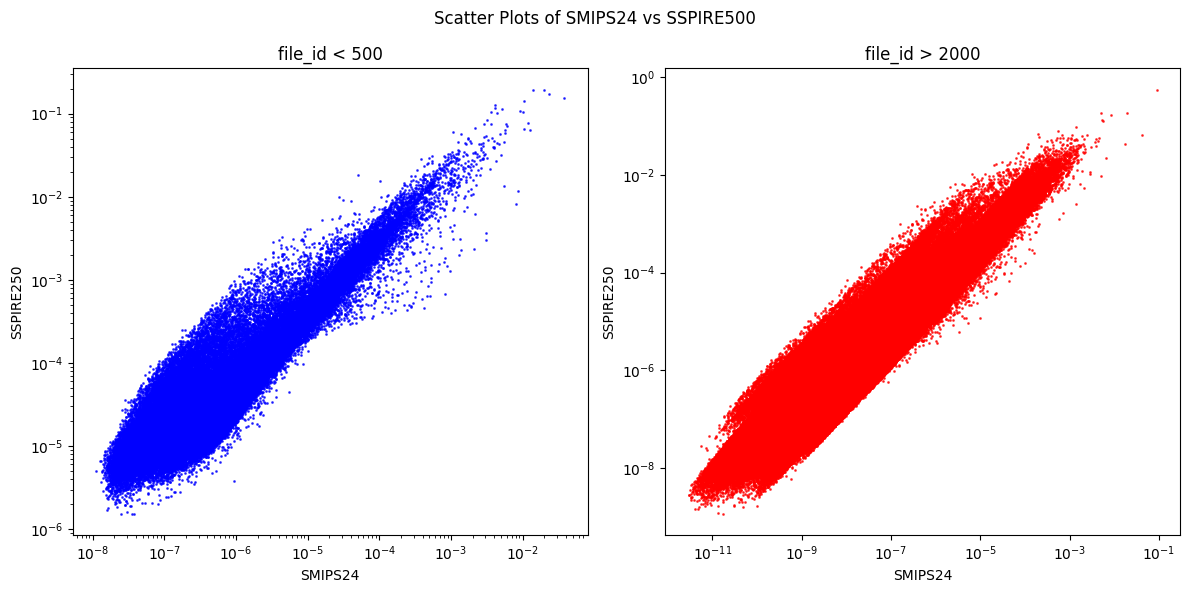

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: file_id < 500
subset1 = df_tmp[df_tmp['file_id'] < 50]
axs[0].scatter(subset1['SMIPS24'], subset1['SSPIRE250'], alpha=0.7, s=1, c='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('SMIPS24')
axs[0].set_ylabel('SSPIRE250')
axs[0].set_title('file_id < 500')

# Right subplot: file_id > 2000
subset2 = df_tmp[df_tmp['file_id'] > 2350]
axs[1].scatter(subset2['SMIPS24'], subset2['SSPIRE250'], alpha=0.7, s=1, c='red')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('SMIPS24')
axs[1].set_ylabel('SSPIRE250')
axs[1].set_title('file_id > 2000')

plt.suptitle('Scatter Plots of SMIPS24 vs SSPIRE500')
plt.tight_layout()
plt.show()

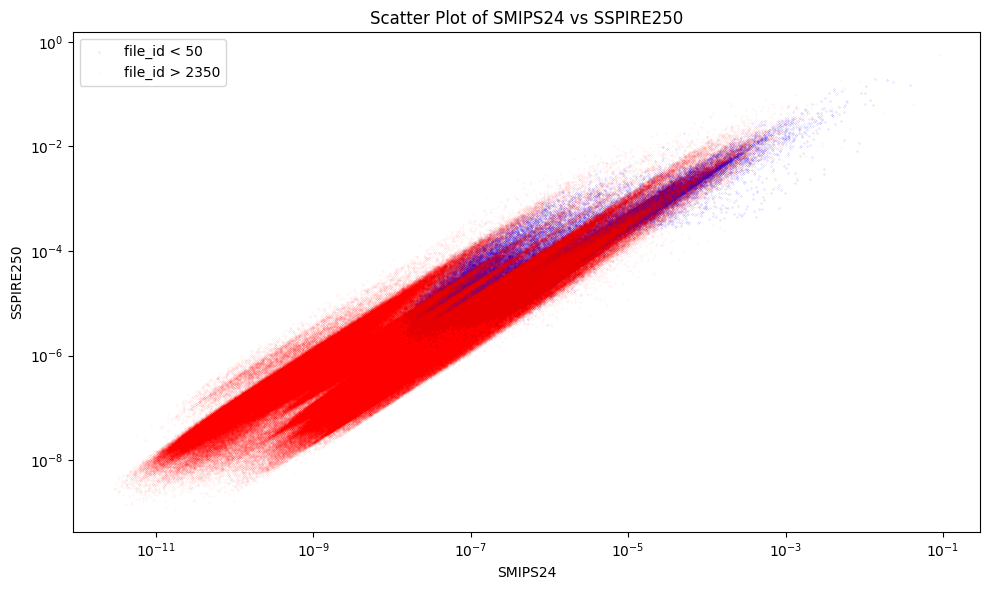

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(subset1['SMIPS24'], subset1['SSPIRE250'], alpha=0.7, s=.01, c='blue', label='file_id < 50')
plt.scatter(subset2['SMIPS24'], subset2['SSPIRE250'], alpha=0.3, s=.01, c='red', label='file_id > 2350')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('SMIPS24')
plt.ylabel('SSPIRE250')
plt.title('Scatter Plot of SMIPS24 vs SSPIRE250')
plt.legend()
plt.tight_layout()
plt.show()


2025-05-31 00:08:59.388436: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(10, 256, 256, 4)


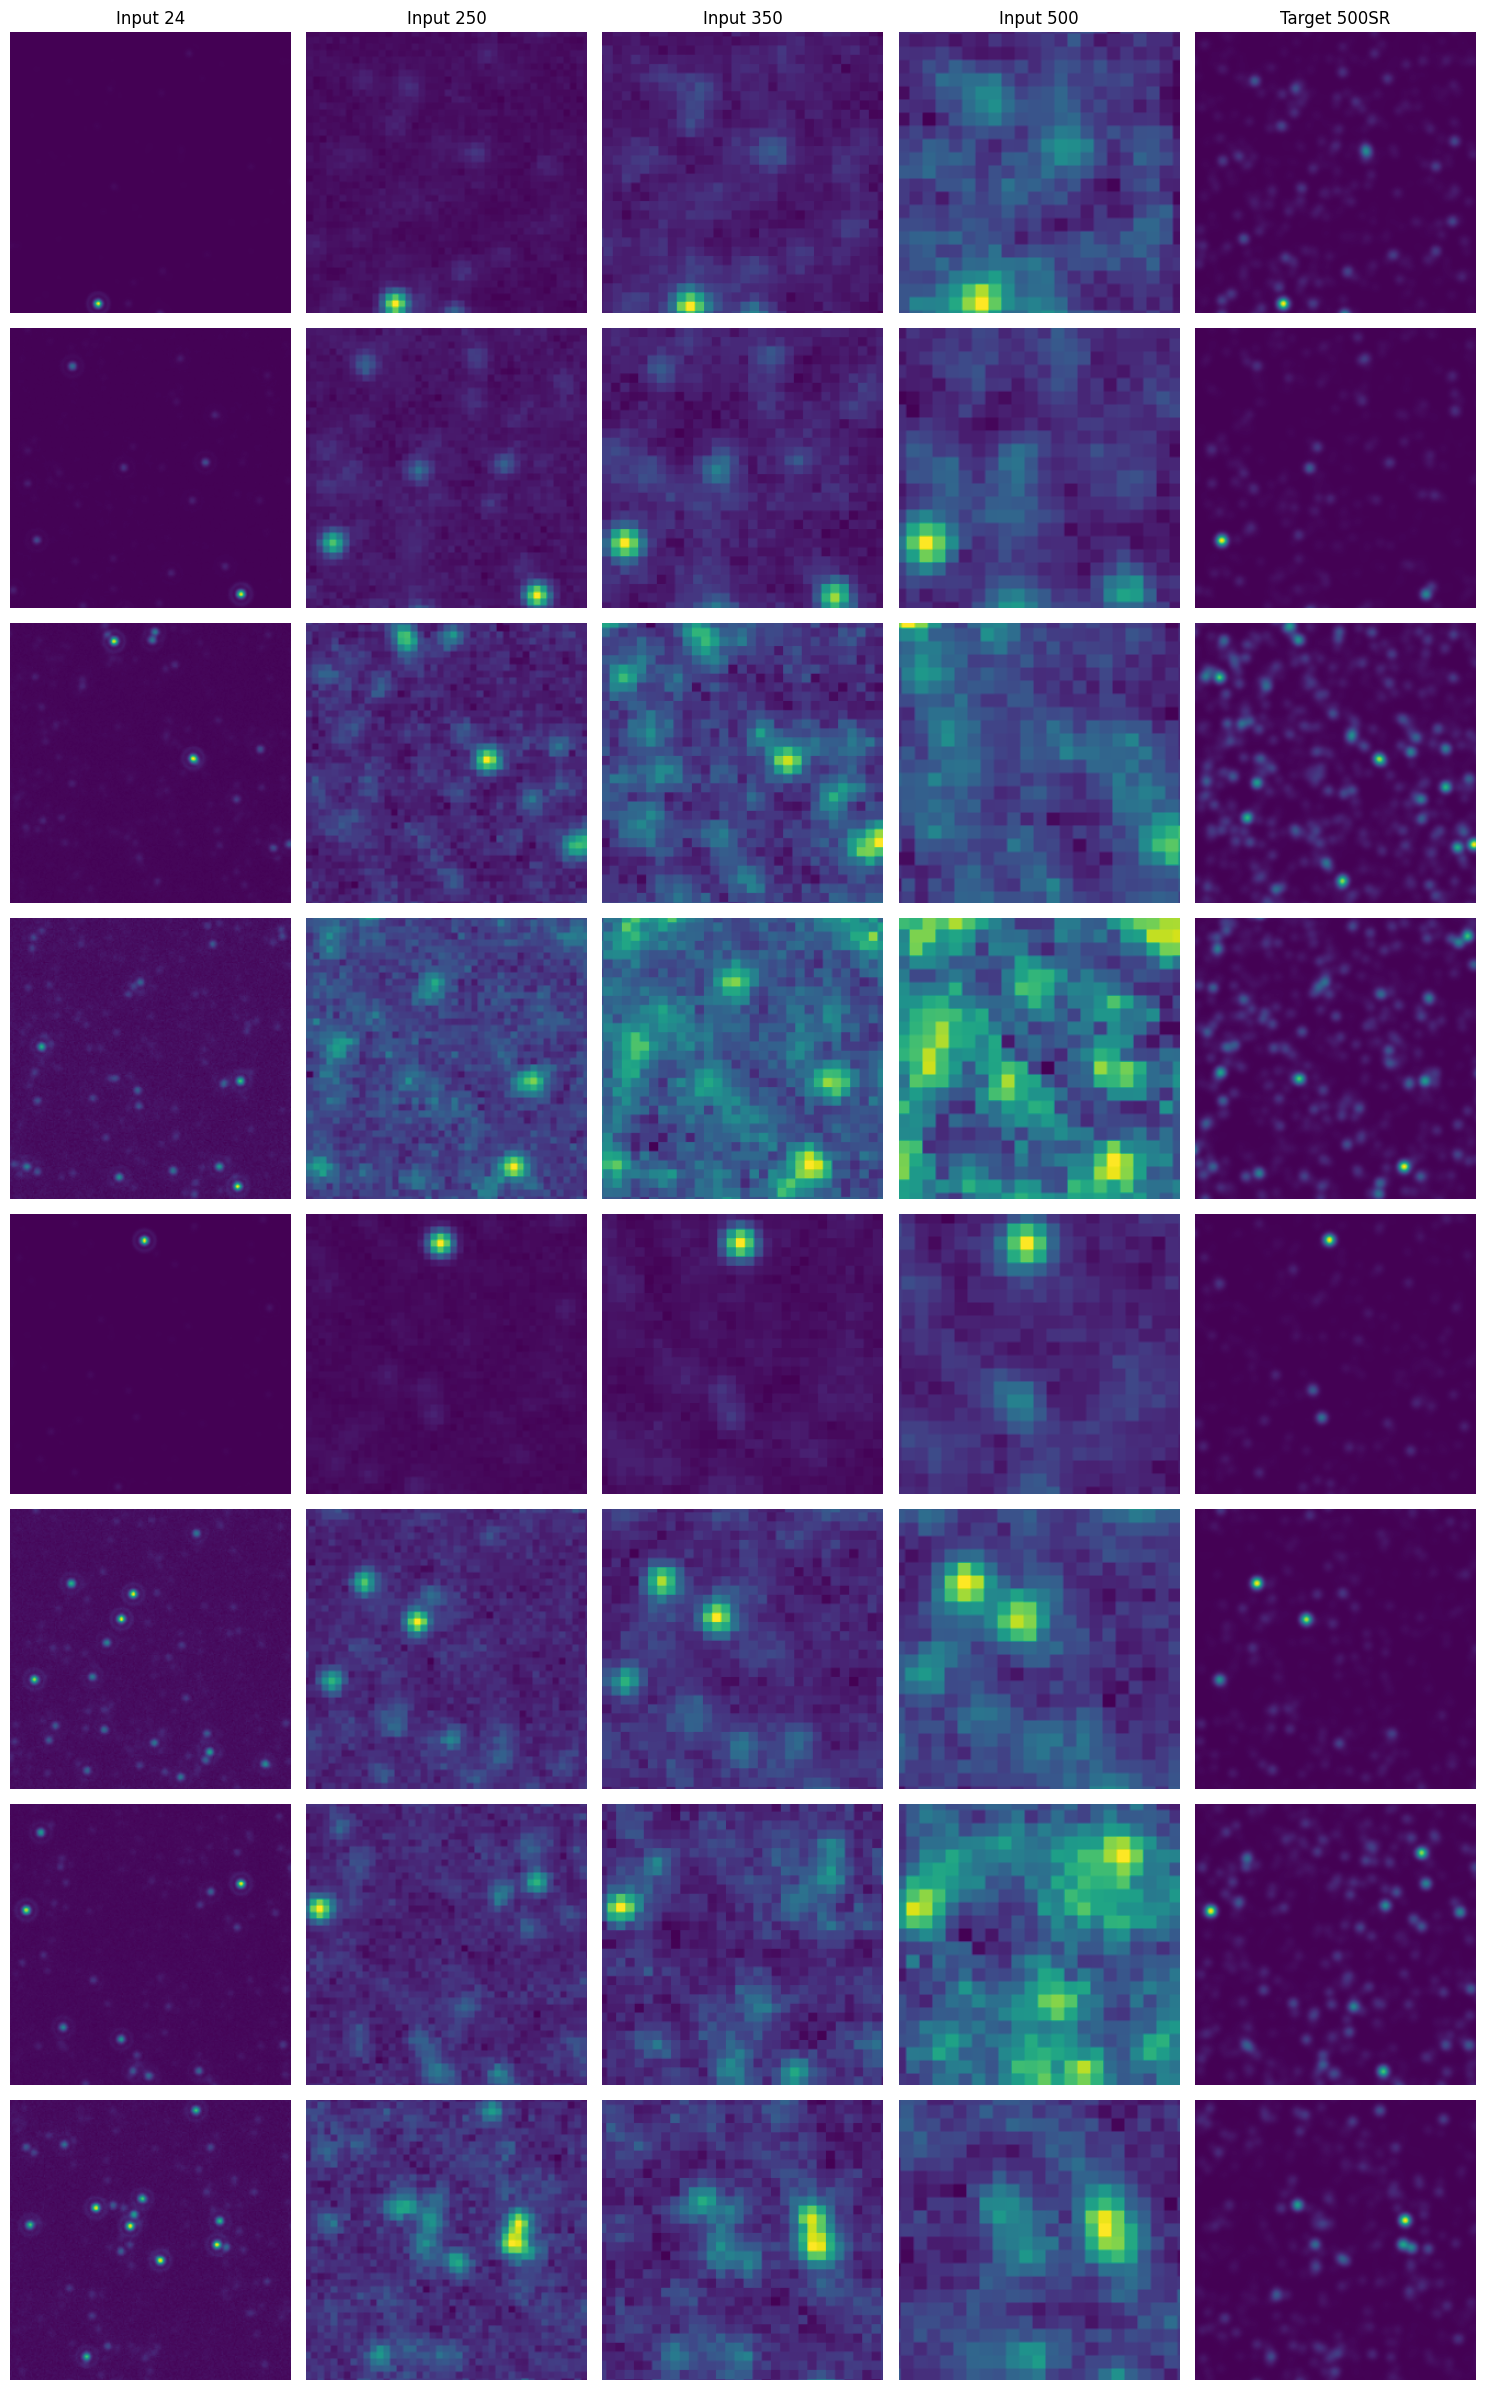

In [4]:
from scripts.utils.data_loader import create_dataset_tf, split_input_labels
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

TRAIN_DIR = "/mnt/g/data/PhD Projects/SR/120deg2_shark_sides/Train"
input_class_names = ["24", "250", "350", "500"]
target_class_names = ["500SR"]
BATCH_SIZE = 10

train_ds, train_num_batches = create_dataset_tf(TRAIN_DIR, input_class_names, target_class_names, BATCH_SIZE, is_training=True)
inputs, labels = split_input_labels(next(iter(train_ds.take(1))), input_class_names, target_class_names)

num_samples = 8  # number of samples to display

fig, axes = plt.subplots(num_samples, 5, figsize=(15, num_samples * 3))
print(inputs.shape)
for i in range(num_samples):
    # Plot the 4 input channels for each sample
    for j in range(4):
        ax = axes[i, j]
        # For sample i, get the j-th channel image: shape (H, W)
        img = inputs[i, :, :, j].numpy() if hasattr(inputs[i, :, :, j], "numpy") else inputs[i, :, :, j]
        ax.imshow(img.squeeze(), cmap="viridis")
        if i == 0:
            ax.set_title(f"Input {input_class_names[j]}")
        ax.axis("off")

    # Plot the target image (using the first channel)
    ax = axes[i, 4]
    target_img = labels[i, :, :, 0].numpy() if hasattr(labels[i, :, :, 0], "numpy") else labels[i, :, :, 0]
    ax.imshow(target_img.squeeze(), cmap="viridis")
    if i == 0:
        ax.set_title(f"Target {target_class_names[0]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

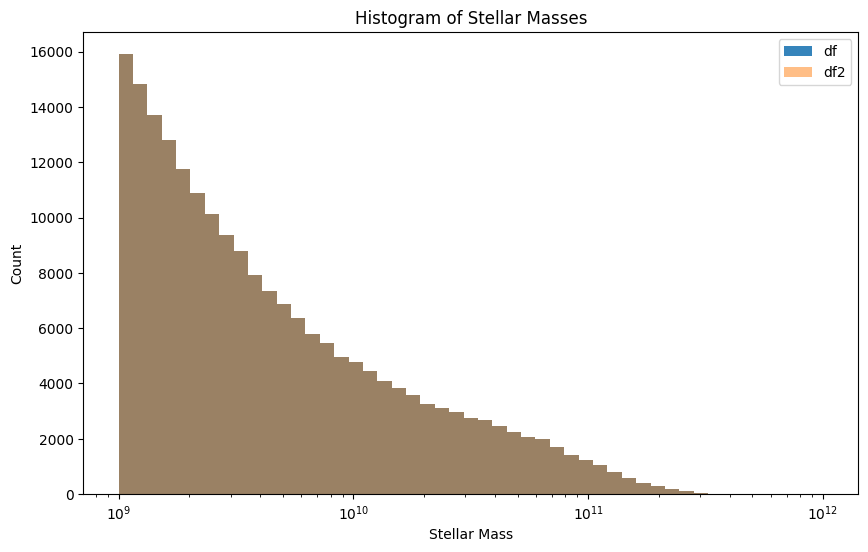

In [9]:
import numpy as np
bins = np.logspace(9, 12, 50)

plt.figure(figsize=(10, 6))
plt.hist(df['Mstar'], bins=bins, alpha=0.9, label='df')
plt.hist(df2['Mstar'], bins=bins, alpha=0.5, label='df2')
plt.xlabel('Stellar Mass')
plt.ylabel('Count')
plt.xscale('log')
plt.title('Histogram of Stellar Masses')
plt.legend()
plt.show()

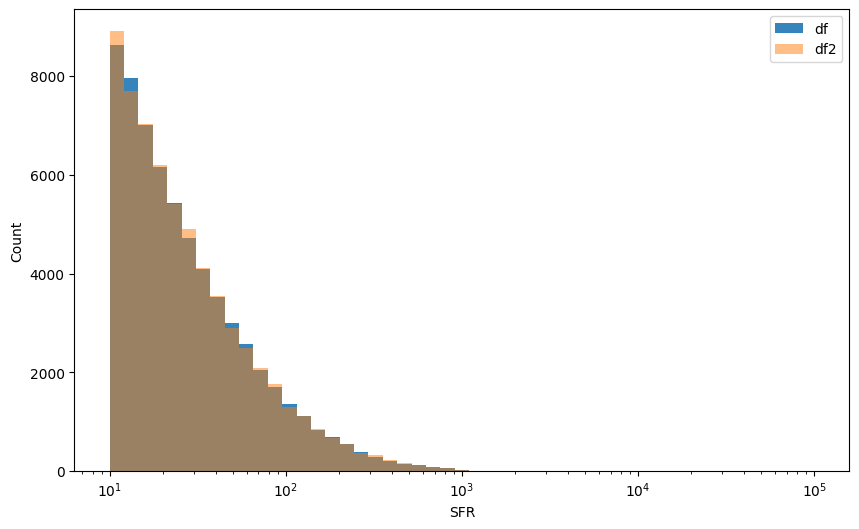

In [13]:
import numpy as np
bins = np.logspace(1, 5, 50)

plt.figure(figsize=(10, 6))
plt.hist(df['SFR'], bins=bins, alpha=0.9, label='df')
plt.hist(df2['SFR'], bins=bins, alpha=0.5, label='df2')
plt.xlabel('SFR')
plt.ylabel('Count')
plt.xscale('log')
plt.legend()
plt.show()

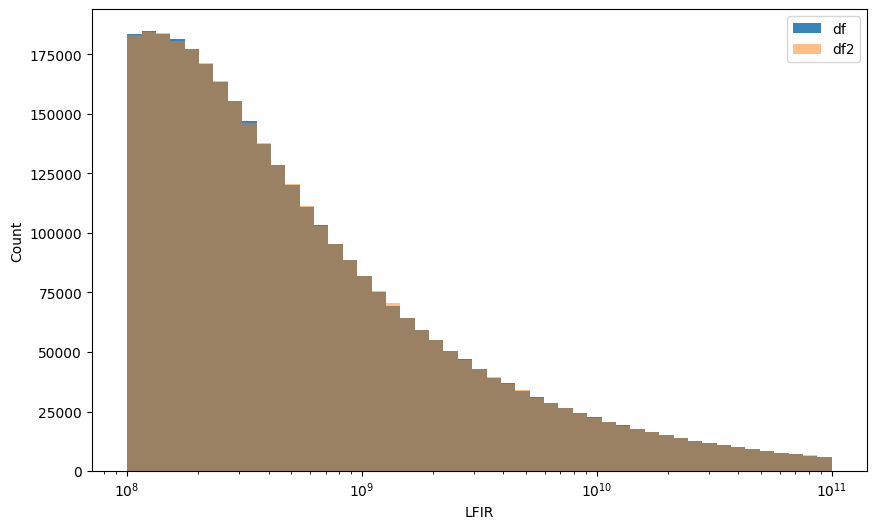

In [15]:
import numpy as np
bins = np.logspace(8, 11, 50)

plt.figure(figsize=(10, 6))
plt.hist(df['LFIR'], bins=bins, alpha=0.9, label='df')
plt.hist(df2['LFIR'], bins=bins, alpha=0.5, label='df2')
plt.xlabel('LFIR')
plt.ylabel('Count')
plt.xscale('log')
plt.legend()
plt.show()

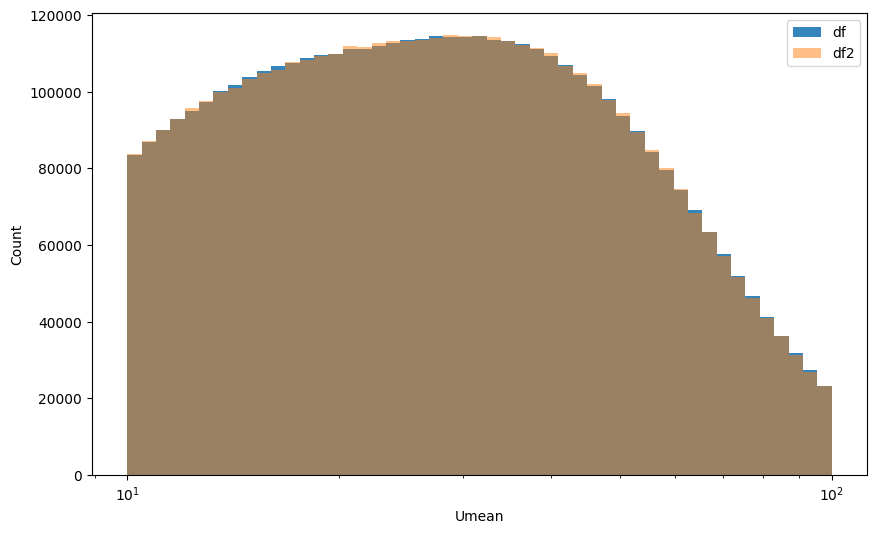

In [17]:
import numpy as np
bins = np.logspace(1, 2, 50)

plt.figure(figsize=(10, 6))
plt.hist(df['Umean'], bins=bins, alpha=0.9, label='df')
plt.hist(df2['Umean'], bins=bins, alpha=0.5, label='df2')
plt.xlabel('Umean')
plt.ylabel('Count')
plt.xscale('log')
plt.legend()
plt.show()

In [14]:
df.columns

Index(['redshift', 'ra', 'dec', 'Mhalo', 'Mstar', 'qflag', 'SFR', 'issb', 'mu',
       'Dlum', 'Umean', 'LIR', 'LFIR', 'LprimCO10', 'ICO10', 'ICO21', 'ICO32',
       'ICO43', 'ICO54', 'ICO65', 'ICO76', 'ICO87', 'LCII_Lagache',
       'ICII_Lagache', 'LCII_de_Looze', 'ICII_de_Looze', 'ICI10', 'ICI21'],
      dtype='object')

In [21]:
df.head()

,redshift,ra,dec,Mhalo,Mstar,qflag,SFR,issb,mu,Dlum,...,ICO54,ICO65,ICO76,ICO87,LCII_Lagache,ICII_Lagache,LCII_de_Looze,ICII_de_Looze,ICI10,ICI21
0,0.012543,-3.596732,-5.917461,2.416642e+10,3.243653e+07,False,0.011491,False,0.998798,56.044728,...,6.669550,4.283645,2.589034,1.400968,4.937810e+04,8.043512,6.609296e+04,10.766302,3.445903,4.663290
1,0.016889,-3.630597,-6.737374,3.624889e+10,1.877616e+08,False,0.017243,False,1.009157,75.706983,...,2.548536,1.818874,1.176518,0.676662,9.215868e+04,8.348069,3.038405e+05,27.522982,2.358309,3.145569
2,0.016890,-4.007979,-6.181762,1.556311e+11,7.702387e+08,True,0.000000,False,1.008800,75.710883,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,0.016899,-3.699935,-6.766959,3.692580e+11,1.643853e+10,False,1.648454,False,0.999162,75.753881,...,134.169155,93.516661,59.635699,33.884847,9.400683e+06,842.079221,9.866730e+06,883.826010,45.448231,28.134301
4,0.016921,-4.387601,-6.474053,1.014987e+10,1.909465e+07,False,0.001027,False,0.998498,75.855771,...,0.347723,0.237003,0.149042,0.083655,5.365242e+02,0.047900,9.094200e+03,0.811917,0.156342,0.108222


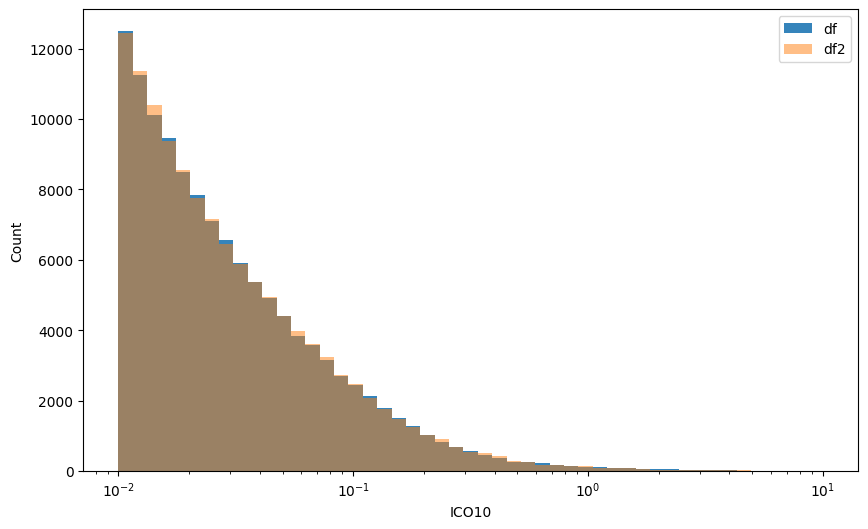

In [25]:
import numpy as np
bins = np.logspace(-2, 1, 50)

plt.figure(figsize=(10, 6))
plt.hist(df['ICO87'], bins=bins, alpha=0.9, label='df')
plt.hist(df2['ICO87'], bins=bins, alpha=0.5, label='df2')
plt.xlabel('ICO10')
plt.ylabel('Count')
plt.xscale('log')
plt.legend()
plt.show()

In [26]:
print("Min redshift:", df["redshift"].min())
print("Max redshift:", df["redshift"].max())

Min redshift: 0.012543339543022444
Max redshift: 7.038794076195858


In [27]:
print("Min redshift:", df2["redshift"].min())
print("Max redshift:", df2["redshift"].max())

Min redshift: 0.012543339543022444
Max redshift: 7.038794076195858


In [30]:
from rich.progress import track

def redshift_generator(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            parts = line.split()
            if parts:
                yield float(parts[2])

# Use the generator to process redshifts one-by-one with a Rich progress bar and record min/max redshift

min_redshift = float('inf')
max_redshift = float('-inf')

# Process redshifts using a progress bar
for z in track(redshift_generator('/mnt/g/data/PhD Projects/SR/Shark-deep-opticalLightcone-AtLAST.txt'),
               description="Processing redshifts"):
    if z < min_redshift:
        min_redshift = z
    if z > max_redshift:
        max_redshift = z

print(f"Min redshift: {min_redshift}")
print(f"Max redshift: {max_redshift}")

Output()

Min redshift: 0.0092249
Max redshift: 6.0929585
